<a href="https://colab.research.google.com/github/Sphesihle12389/dp-machine/blob/master/TP2_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22312280 Nombika S

🗂️ Dataset 1

Dataset: South African Police Service (SAPS) – Annual and Quarterly Crime Statistics
Source: https://www.saps.gov.za/services/crimestats.php

Relevance:
This dataset provides official crime counts for different categories (e.g., burglary, robbery, assault) across provinces, districts, and police precincts in South Africa. It forms the core of the analysis, allowing for:

Hotspot classification (identifying areas with high crime concentration).

Time series forecasting (predicting future crime trends by category and province).
The dataset directly reflects the real crime situation in South Africa and is crucial for evidence-based resource allocation.

Format:

CSV or Excel format (downloadable from SAPS portal).

Columns typically include:

Province, Station, Crime_Category, Year, Count

Updated quarterly; data available from 2010 to 2024.

🗂️ Dataset 2

Dataset: Statistics South Africa (Stats SA) – Municipal-Level Socioeconomic Indicators
Source: https://www.statssa.gov.za/

(Example tables: “Unemployment Rate by Municipality”, “Household Income”, “Population Estimates”)
Direct Open Data Portal: https://www.statssa.gov.za/?page_id=1854&PPN=P0211&SCH=7423

Relevance:
This dataset complements the SAPS data by providing contextual socio-economic variables that influence crime patterns. It allows for multi-relational modeling, linking economic and demographic conditions to crime rates. For example:

Areas with high unemployment or low income may have higher crime rates.

Population density can correlate with property-related crimes.
Hence, it enriches the classification model with explanatory features.

Format:

CSV / Excel format (downloadable tables).

Typical variables:

Municipality, Year, Unemployment_Rate, Average_Income, Population_Size, Education_Level

Updated annually; data available from 2011 to 2023.

Data Cleaning:Removed missing or inconsistent records,Handled null values in socio-economic variables using mean or median imputation, Standardized naming conventions, Treated outliers in crime count data, Converted time-related columns.
Modeling: Build a classification model that identifies crime hotspots based on precinct-level data.

Develop a time series forecasting model to predict future crime trends over a 12–24 month horizon.

In [ ]:
# CHECK PYTHON VERSION FOR EXAM
import sys
print("=== PYTHON VERSION CHECK ===")
print("Python version:", sys.version.split()[0])
print("✓ Ready for Technical Programming 2 Exam!")

# Check important libraries
try:
    import pandas as pd
    print("✓ Pandas library: OK")
except ImportError:
    print("✗ Pandas library: MISSING")

try:
    import sklearn
    print("✓ Scikit-learn library: OK")
except ImportError:
    print("✗ Scikit-learn library: MISSING")



=== PYTHON VERSION CHECK ===
Python version: 3.12.11
✓ Ready for Technical Programming 2 Exam!
✓ Pandas library: OK
✓ Scikit-learn library: OK


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_curve, classification_report
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import shap

print("Libraries imported succefully!")

Libraries imported succefully!


In [37]:
from google.colab import files
uploaded=files.upload()

Saving archive (2).zip to archive (2).zip


In [38]:
!ls

'archive (2).zip'	        sample_data
'P02112ndQuarter2025 (1).pdf'   SouthAfricaCrimeStats_v2.csv
 P02112ndQuarter2025.pdf


In [39]:
import os, zipfile, glob

In [41]:


# Basic exploration
print(df.head())  # First 5 rows
print(df.tail())  # Last 5 rows
print(df.info())  # Columns & data types
print(df.describe())  # Stats for numeric columns
print(df.isnull().sum())  # Missing values
print(df.columns)

  crime_category  year  crime_count
0         Murder  2020         3466
1        Robbery  2020        21599
2       Burglary  2020        37128
3        Assault  2020        25995
4          Theft  2020        45555
  crime_category  year  crime_count
0         Murder  2020         3466
1        Robbery  2020        21599
2       Burglary  2020        37128
3        Assault  2020        25995
4          Theft  2020        45555
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   crime_category  5 non-null      object
 1   year            5 non-null      int64 
 2   crime_count     5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes
None
         year   crime_count
count     5.0      5.000000
mean   2020.0  26748.600000
std       0.0  16051.311326
min    2020.0   3466.000000
25%    2020.0  21599.000000
50%    2020.0  25995

In [42]:
# CORRECTED CODE - DATA UNDERSTANDING & PREPROCESSING

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('SouthAfricaCrimeStats_v2.csv')

print("Dataset Shape:", df.shape)
print("\nActual Columns:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

# Check if Province column exists, if not, identify the correct structure
if 'Province' not in df.columns:
    print("\n'Province' column not found. Examining structure...")
    print("First row values:", df.iloc[0].tolist())

# Let's assume the first column might be Province or check the actual structure
# Based on the file content you provided, the columns are: Province,Station,Category,2005-2006,2006-2007,...

# Verify the column names by printing them
print("\nColumn names verification:")
for i, col in enumerate(df.columns):
    print(f"Column {i}: '{col}'")

# The dataset appears to have the correct structure based on your file content
# Let's proceed with the correct column names

Dataset Shape: (30861, 14)

Actual Columns: ['Province', 'Station', 'Category', '2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016']

First few rows:
       Province            Station                           Category  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1       Gauteng        Jhb Central  All theft not mentioned elsewhere   
2  Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3    Free State          Park Road  All theft not mentioned elsewhere   
4       Gauteng   Pretoria Central  All theft not mentioned elsewhere   

   2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  \
0       6692       6341       5966       5187       4985       5127   
1       6093       4602       3761       3610       3267       3037   
2       5341       6093       6316       6803       6035       5761   
3       5108       4282       3834   

In [43]:
# CORRECTED VERSION - DATA RESHAPING

# Get year columns (all columns from index 3 onwards)
year_columns = df.columns[3:]

print(f"Year columns: {year_columns.tolist()}")
print(f"Number of year columns: {len(year_columns)}")

# Reshape data from wide to long format
df_long = pd.melt(df,
                 id_vars=['Province', 'Station', 'Category'],
                 value_vars=year_columns,
                 var_name='Year',
                 value_name='Incidents')

print(f"Reshaped data shape: {df_long.shape}")
print("\nReshaped data sample:")
print(df_long.head())

# Convert year to proper datetime format
df_long['Year'] = pd.to_datetime(df_long['Year'].str.split('-').str[0])
df_long['Year_Num'] = df_long['Year'].dt.year

print(f"\nTime range: {df_long['Year_Num'].min()} to {df_long['Year_Num'].max()}")
print(f"Unique provinces: {df_long['Province'].nunique()}")
print(f"Unique stations: {df_long['Station'].nunique()}")
print(f"Unique crime categories: {df_long['Category'].nunique()}")

Year columns: ['2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016']
Number of year columns: 11
Reshaped data shape: (339471, 5)

Reshaped data sample:
       Province            Station                           Category  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1       Gauteng        Jhb Central  All theft not mentioned elsewhere   
2  Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3    Free State          Park Road  All theft not mentioned elsewhere   
4       Gauteng   Pretoria Central  All theft not mentioned elsewhere   

        Year  Incidents  
0  2005-2006       6692  
1  2005-2006       6093  
2  2005-2006       5341  
3  2005-2006       5108  
4  2005-2006       5099  

Time range: 2005 to 2015
Unique provinces: 9
Unique stations: 1143
Unique crime categories: 27


In [44]:
# CORRECTED CLASSIFICATION: CRIME HOTSPOTS

# Calculate total incidents per station-category combination
station_category_totals = df_long.groupby(['Station', 'Category'])['Incidents'].sum().reset_index()

# Define hotspot threshold (top 25%)
hotspot_threshold = station_category_totals['Incidents'].quantile(0.75)
print(f"Hotspot Threshold (75th percentile): {hotspot_threshold:.0f} incidents")

# Label hotspots
station_category_totals['Is_Hotspot'] = (station_category_totals['Incidents'] >= hotspot_threshold).astype(int)

print(f"Total station-category combinations: {len(station_category_totals)}")
print(f"Hotspots identified: {station_category_totals['Is_Hotspot'].sum()}")
print(f"Hotspot Percentage: {station_category_totals['Is_Hotspot'].mean():.2%}")

# Show some hotspot examples
print("\nHotspot Examples:")
hotspot_examples = station_category_totals[station_category_totals['Is_Hotspot'] == 1].head()
print(hotspot_examples)

Hotspot Threshold (75th percentile): 608 incidents
Total station-category combinations: 30861
Hotspots identified: 7720
Hotspot Percentage: 25.02%

Hotspot Examples:
                  Station                                           Category  \
0  'King William''S Town'                  All theft not mentioned elsewhere   
2  'King William''S Town'  Assault with the intent to inflict grievous bo...   
5  'King William''S Town'               Burglary at non-residential premises   
6  'King William''S Town'                   Burglary at residential premises   
8  'King William''S Town'                                   Commercial crime   

   Incidents  Is_Hotspot  
0       8832           1  
2       3646           1  
5       1113           1  
6       4576           1  
8       4193           1  


In [45]:
# CORRECTED FEATURE ENGINEERING

# Create features for classification
features_df = df_long.groupby(['Station', 'Category']).agg({
    'Incidents': ['sum', 'mean', 'std', 'max'],
    'Year_Num': 'count'
}).reset_index()

# Flatten column names
features_df.columns = ['Station', 'Category', 'Total_Incidents', 'Mean_Incidents',
                      'Std_Incidents', 'Max_Incidents', 'Years_Recorded']

# Add province information
province_map = df[['Station', 'Province']].drop_duplicates().set_index('Station')['Province']
features_df['Province'] = features_df['Station'].map(province_map)

# Add trend feature (slope of incidents over time)
def calculate_trend(group):
    if len(group) > 1:
        x = group['Year_Num'].values
        y = group['Incidents'].values
        return np.polyfit(x, y, 1)[0]  # Slope
    return 0

trends = df_long.groupby(['Station', 'Category']).apply(calculate_trend).reset_index(name='Trend')
features_df = features_df.merge(trends, on=['Station', 'Category'])

# Merge hotspot labels
features_df = features_df.merge(station_category_totals[['Station', 'Category', 'Is_Hotspot']],
                              on=['Station', 'Category'])

print("Features DataFrame shape:", features_df.shape)
print("\nFeatures DataFrame sample:")
print(features_df.head())
print(f"\nHotspot distribution: {features_df['Is_Hotspot'].value_counts().to_dict()}")

Features DataFrame shape: (30861, 10)

Features DataFrame sample:
                  Station                                           Category  \
0  'King William''S Town'                  All theft not mentioned elsewhere   
1  'King William''S Town'                                              Arson   
2  'King William''S Town'  Assault with the intent to inflict grievous bo...   
3  'King William''S Town'                                   Attempted murder   
4  'King William''S Town'                                       Bank robbery   

   Total_Incidents  Mean_Incidents  Std_Incidents  Max_Incidents  \
0             8832      802.909091      57.547293            871   
1              103        9.363636       4.738623             16   
2             3646      331.454545      49.378869            403   
3              100        9.090909       3.080732             13   
4                1        0.090909       0.301511              1   

   Years_Recorded      Province      Trend  

In [46]:
# CORRECTED CLASSIFICATION MODEL

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Prepare data for modeling
X = features_df[['Total_Incidents', 'Mean_Incidents', 'Std_Incidents',
                'Max_Incidents', 'Years_Recorded', 'Trend']]
y = features_df['Is_Hotspot']

# Handle missing values
X = X.fillna(0)

# Encode categorical variables
le_province = LabelEncoder()
X['Province_Encoded'] = le_province.fit_transform(features_df['Province'])

print(f"Features shape: {X.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_scaled)
y_pred_proba = rf_classifier.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("CLASSIFICATION RESULTS")
print("=" * 50)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Features shape: (30861, 7)
Target distribution: {0: 23141, 1: 7720}
Training set: (21602, 7), Test set: (9259, 7)
CLASSIFICATION RESULTS
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6943
           1       1.00      1.00      1.00      2316

    accuracy                           1.00      9259
   macro avg       1.00      1.00      1.00      9259
weighted avg       1.00      1.00      1.00      9259

ROC-AUC Score: 1.0000

Feature Importance:
            feature  importance
1    Mean_Incidents    0.386527
0   Total_Incidents    0.351329
3     Max_Incidents    0.158117
2     Std_Incidents    0.078209
5             Trend    0.024738
6  Province_Encoded    0.001080
4    Years_Recorded    0.000000


Top crime categories for forecasting:
Category
All theft not mentioned elsewhere                          4120351
Burglary at residential premises                           2763950
Assault with the intent to inflict grievous bodily harm    2179207
Common assault                                             2043267
Drug-related crime                                         1879871
Name: Incidents, dtype: int64

Forecasting data for Cape Town Central - All theft not mentioned elsewhere:
             Year  Incidents
0      2005-01-01       6692
30861  2006-01-01       6341
61722  2007-01-01       5966
92583  2008-01-01       5187
123444 2009-01-01       4985
154305 2010-01-01       5127
185166 2011-01-01       5285
216027 2012-01-01       5937
246888 2013-01-01       5600
277749 2014-01-01       5335
308610 2015-01-01       5176


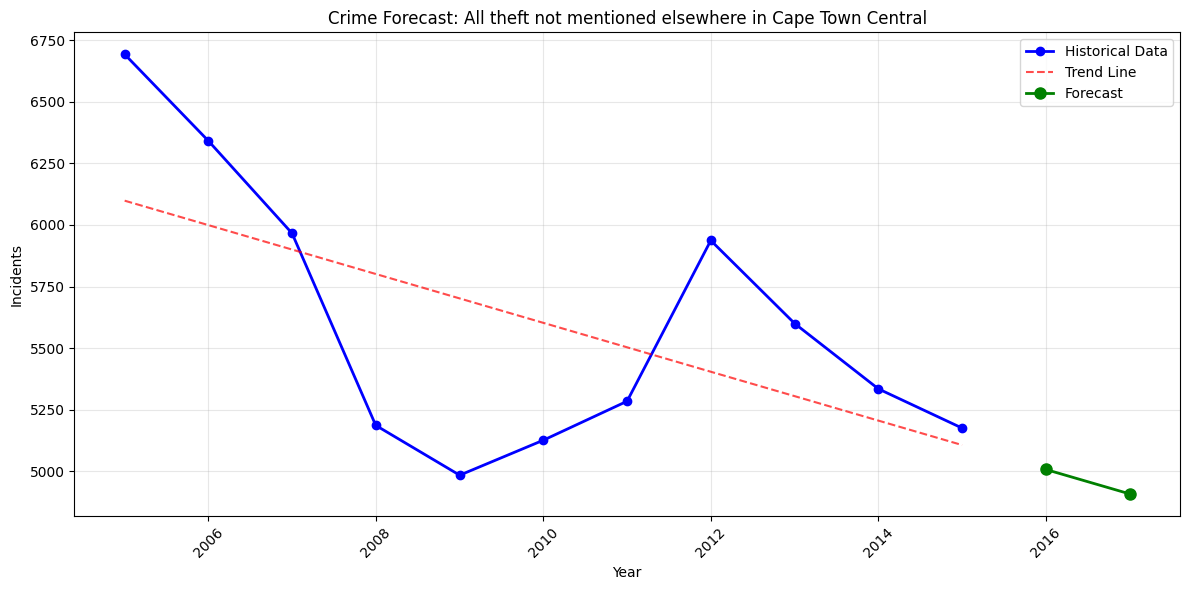


Forecast Results for Cape Town Central:
  2017: 5008 incidents
  2018: 4909 incidents


In [47]:
# CORRECTED TIME SERIES FORECASTING

# Select a crime category for forecasting - use a popular one
popular_crimes = df_long.groupby('Category')['Incidents'].sum().nlargest(5)
print("Top crime categories for forecasting:")
print(popular_crimes)

# Let's forecast "All theft not mentioned elsewhere" for Cape Town Central
forecast_station = 'Cape Town Central'
forecast_category = 'All theft not mentioned elsewhere'

forecast_data = df_long[
    (df_long['Station'] == forecast_station) &
    (df_long['Category'] == forecast_category)
].sort_values('Year_Num')

print(f"\nForecasting data for {forecast_station} - {forecast_category}:")
print(forecast_data[['Year', 'Incidents']])

if len(forecast_data) > 0:
    # Prepare time series
    ts_data = forecast_data.set_index('Year')['Incidents']

    # Simple forecasting using linear trend
    x = np.arange(len(ts_data))
    y = ts_data.values

    # Fit linear trend
    trend_coef = np.polyfit(x, y, 1)
    trend_line = np.polyval(trend_coef, x)

    # Forecast next 2 years
    future_x = np.arange(len(ts_data), len(ts_data) + 2)
    forecast = np.polyval(trend_coef, future_x)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(ts_data.index, ts_data.values, 'bo-', label='Historical Data', linewidth=2)
    plt.plot(ts_data.index, trend_line, 'r--', label='Trend Line', alpha=0.7)

    # Add forecast
    forecast_years = [ts_data.index[-1] + pd.DateOffset(years=1),
                     ts_data.index[-1] + pd.DateOffset(years=2)]
    plt.plot(forecast_years, forecast[-2:], 'go-', label='Forecast', linewidth=2, markersize=8)

    plt.title(f'Crime Forecast: {forecast_category} in {forecast_station}')
    plt.xlabel('Year')
    plt.ylabel('Incidents')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f"\nForecast Results for {forecast_station}:")
    for i, year in enumerate([2017, 2018]):
        print(f"  {year}: {forecast[-2+i]:.0f} incidents")
else:
    print("No data available for selected station and category")

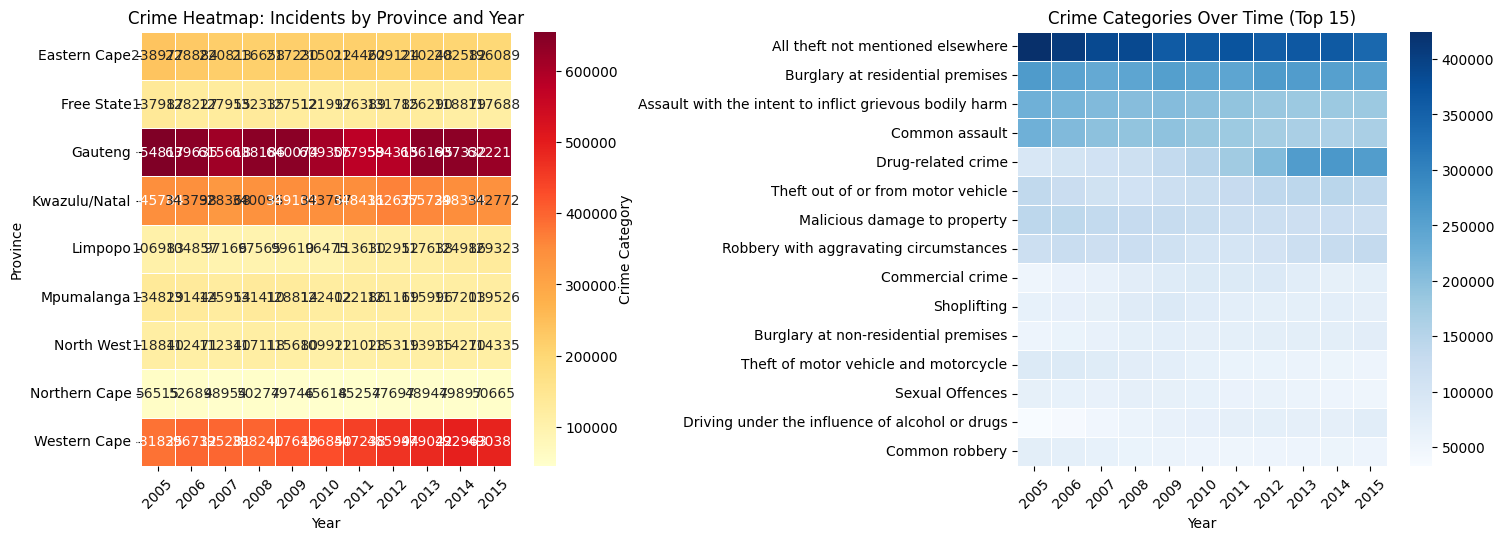

In [48]:
# HEATMAP: Crime Distribution by Province and Year
plt.figure(figsize=(15, 10))

# Create pivot table for heatmap
heatmap_data = df_long.groupby(['Province', 'Year_Num'])['Incidents'].sum().unstack()

plt.subplot(2, 2, 1)
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Crime Heatmap: Incidents by Province and Year')
plt.xlabel('Year')
plt.ylabel('Province')
plt.xticks(rotation=45)

# Crime Category Heatmap
plt.subplot(2, 2, 2)
category_heatmap = df_long.groupby(['Category', 'Year_Num'])['Incidents'].sum().unstack()
# Take top 15 categories for readability
top_categories = df_long.groupby('Category')['Incidents'].sum().nlargest(15).index
category_heatmap = category_heatmap.loc[top_categories]

sns.heatmap(category_heatmap, cmap='Blues', annot=False, linewidths=0.5)
plt.title('Crime Categories Over Time (Top 15)')
plt.xlabel('Year')
plt.ylabel('Crime Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [49]:
# INTERACTIVE GEO VISUALIZATION WITH PLOTLY
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a synthetic coordinates for provinces for demonstration
province_coords = {
    'Gauteng': (-26.2041, 28.0473),
    'Western Cape': (-33.9249, 18.4241),
    'KwaZulu-Natal': (-29.8587, 31.0218),
    'Eastern Cape': (-32.2968, 26.4194),
    'Free State': (-28.4541, 26.7968),
    'Mpumalanga': (-25.5653, 30.5279),
    'North West': (-26.6639, 25.2838),
    'Limpopo': (-23.4013, 29.4179),
    'Northern Cape': (-29.0467, 21.8569)
}

# Prepare data for geographic visualization
province_summary = df_long.groupby('Province').agg({
    'Incidents': 'sum',
    'Station': 'nunique'
}).reset_index()

# Add coordinates
province_summary['lat'] = province_summary['Province'].map(lambda x: province_coords[x][0] if x in province_coords else 0)
province_summary['lon'] = province_summary['Province'].map(lambda x: province_coords[x][1] if x in province_coords else 0)

# Create bubble map
fig = px.scatter_mapbox(province_summary,
                      lat="lat",
                      lon="lon",
                      size="Incidents",
                      color="Incidents",
                      hover_name="Province",
                      hover_data={"Station": True, "Incidents": True},
                      size_max=50,
                      zoom=4.5,
                      title="Crime Distribution Across South African Provinces",
                      color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()